# Titanic Analysis

In this jupyter, we will be doing the infamous Titanic Analysis in Kaggle. This is the first notebook where I doing Machine Learning projects using different Python Tools such as Scikit Learning etc. 

<b>Objectives</b>: Extensively analyze the data to gain insights and then run different Machine Learning algorithms to predict whether a particular passenger survived or not

<p><strong>Methodology:&nbsp;</strong>In this project, this is the following methodology that we are going to follow</p>
<ol>
    <li>Clean and Refine the data for better clarity</li>
    <li>Run different visualization to gain some insights&nbsp;</li>
    <li>Execute different machine learning programs to predict the survivorship status</li>
</ol>

<p><strong><span style="font-size: 24px;">Chapter 1:&nbsp;</span></strong><span style="font-size: 24px;">Uploading and Refining the data</span></p>
<p><span style="font-size: 18px;">In this chapter, first we will load both train and test data and further check the data format.</span></p>

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [86]:
pd.set_option('display.max_columns', None)

In [87]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
print("The dimension of the train matrix is", str(train.shape))
print("The dimension of the test matrix is", str(test.shape))

The dimension of the train matrix is (891, 12)
The dimension of the test matrix is (418, 11)


<p>With this, we were able to have a better understanding of how exactly the database is shaped and structured. Here we can use a variety of other commands too for more in-depth understanding.</p>

In [91]:
combined = pd.concat([train, test])
combined.shape
combined = combined.reset_index(drop=True)

In [92]:
combined.info()
combined.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<p><strong><span style="font-size: 24px;">Chapter 2:&nbsp;</span></strong><span style="font-size: 24px;">Understanding the data</span></p>
<p><span style="font-size: 18px;">In this chapter, we will further analyze this model to understand the distribution of the data. Please note that we will be combining the train and test data to get a more holistic understanding of the dataset.</span></p>

<p>First off, we will try by understanding the gender distribution</p>

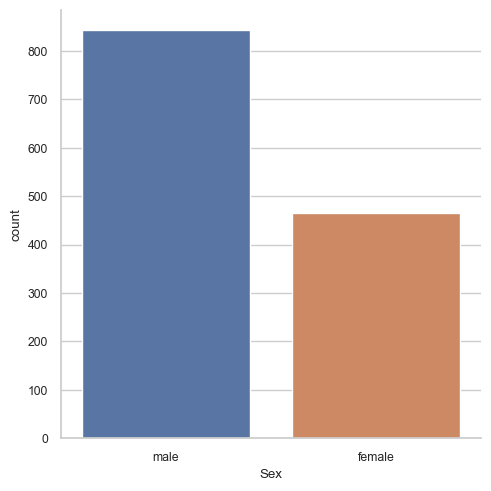

In [93]:
#Creating a factorplot, charting the number of male and female passengers
sns.catplot(x='Sex',data=combined,kind='count')

<p>Here we are clearly see that the male passenger were significantly higher than the female passengers</p>

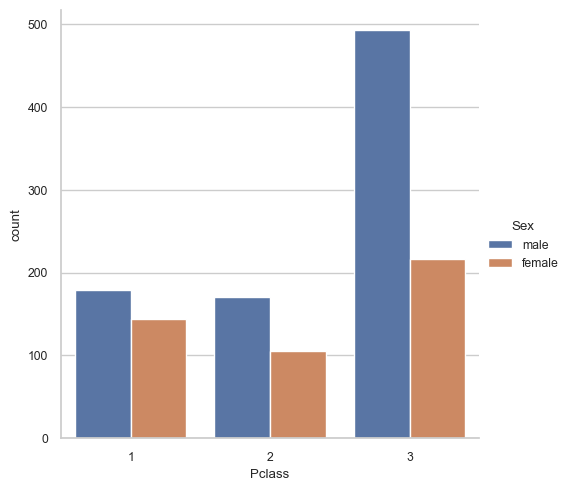

In [94]:
sns.catplot(x='Pclass',data=combined,hue='Sex',kind='count')

<p>If we further bifurcate the data according to the Pclass, we will have a better understaning the Passenger Class distribution</p>

<p>Using this let's expand this into other distribution</p>

Since since we are also analyzing age which is a continious value, we shall use the FacetGrid to better understand the distribution of the age againist different Sex.

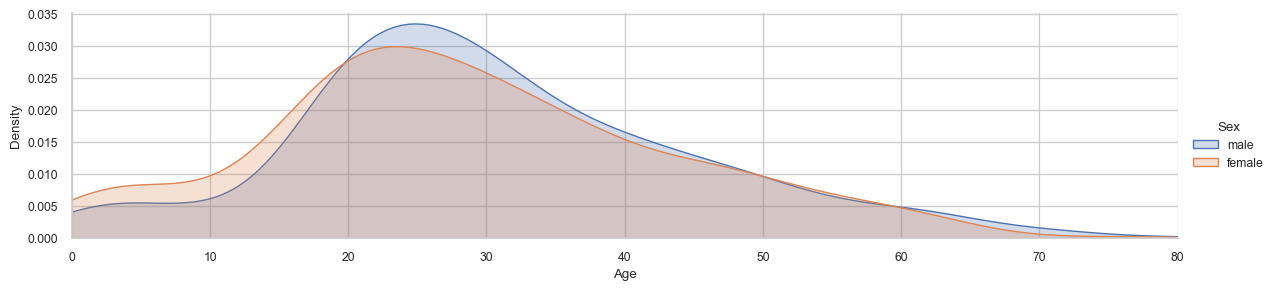

In [95]:
fig = sns.FacetGrid(combined,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,combined['Age'].max()))
fig.add_legend()

With this we concluded that the age distribution is more or less similar for eachsex 

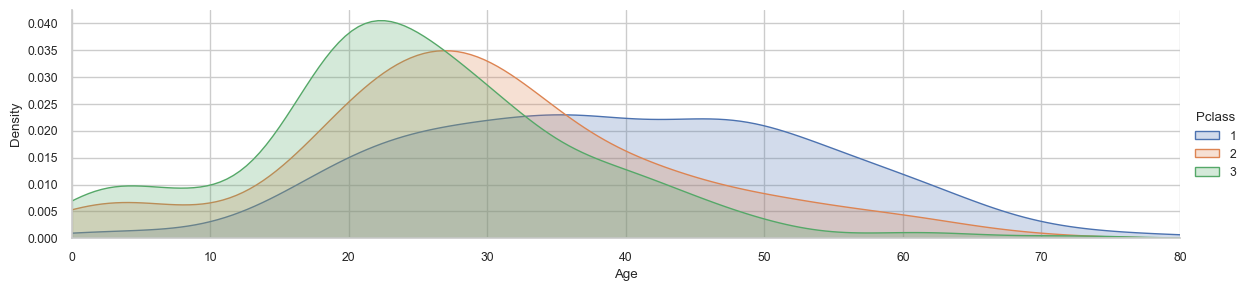

In [96]:
fig = sns.FacetGrid(combined,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
fig.set(xlim=(0,combined['Age'].max()))
fig.add_legend()

With these visuals, we are able to udnerstand a strong co-relation between the Passenger Class againist the Age factor. Older passengers tend to travel on higher Passenger Class compared to younger passenger

<p><strong><span style="font-size: 24px;">Chapter 3:&nbsp;</span></strong><span style="font-size: 24px;">Survivorship Bias</span></p>
<p><span style="font-size: 18px;">In this chapter, we will gauge the impact of each factor againist survival rate of the passengers. This help us provide us further insights of how significant is each factor against the final survival value</span></p>

<p><span style="font-size: 20px;"><strong>Factor #1:</strong></span><span style="font-size: 18px;"> Sex</span></p>

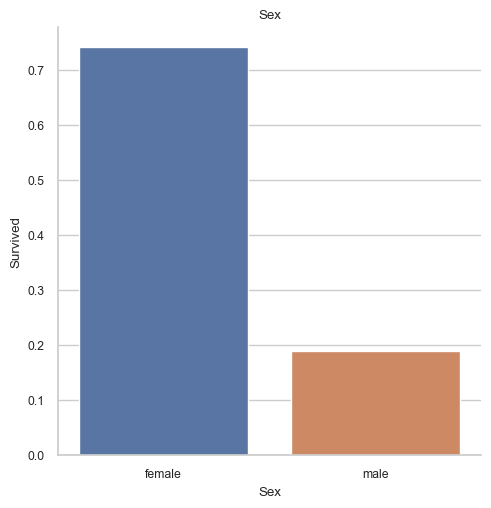

In [97]:
Sex_Analysis = combined[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='Sex',y='Survived',data=Sex_Analysis,kind="bar").set(title='Sex')

<p><span style="font-size: 18px;">Here you can see a clear relationship, the chances of surviving are almost 3.5x higher for females against males.</span></p>

<p><span style="font-size: 20px;"><strong>Factor #2:</strong></span><span style="font-size: 18px;"> Passenger Class</span></p>

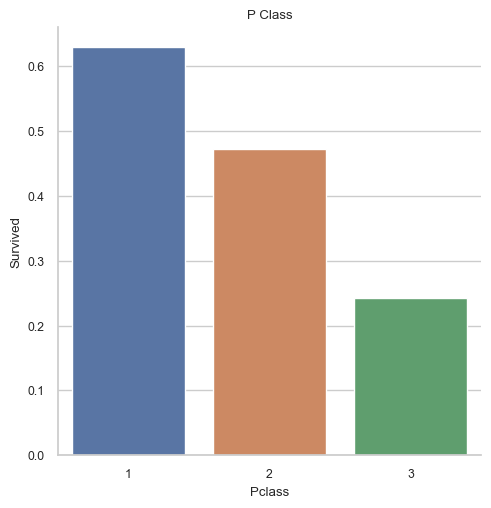

In [98]:
Pclass_Analysis = combined[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='Pclass',y='Survived',data=Pclass_Analysis,kind="bar").set(title='P Class')

<p><span style="font-size: 18px;">Once again there is a clear relationship defined, the chances of surviving are significantly decreased once you go to a lower Passenger Class.</span></p>

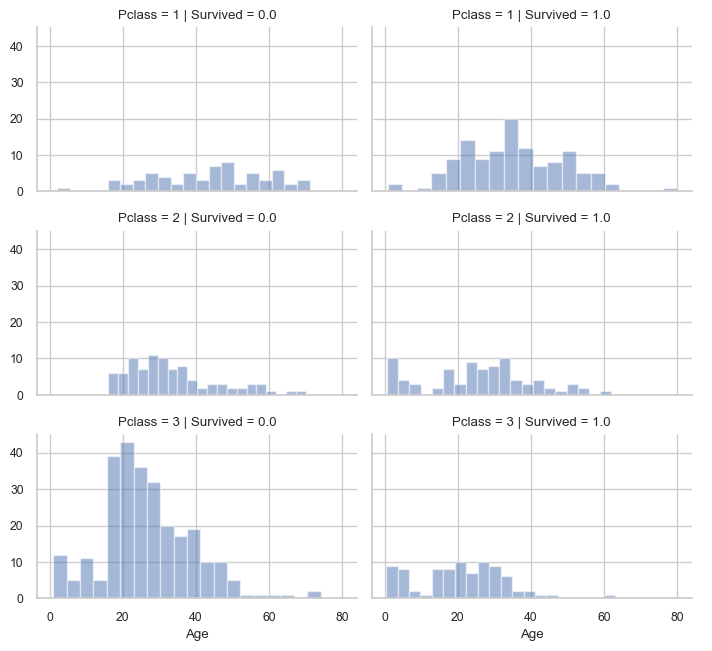

In [99]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(combined, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<p><span style="font-size: 18px;">Furthermore bifurcating the data in terms of age, provide us further insights like</span></p>
<ul>
    <li><span style="font-size: 18px;">P-class 1 survivors had higher age distribution than those who didn&apos;t survive.</span></li>
    <li><span style="font-size: 18px;">Opposite for Plcass 2 where the passenger who did not survive had higher age distribution.</span></li>
</ul>

<p><span style="font-size: 20px;"><strong>Factor #3:</strong></span><span style="font-size: 18px;"> Sibsp</span></p>

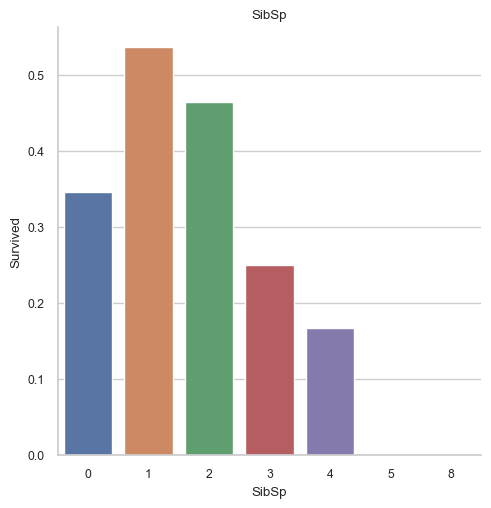

In [100]:
SibSp_Analysis = combined[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='SibSp',y='Survived',data=SibSp_Analysis,kind="bar").set(title='SibSp')

<p><span style="font-size: 20px;"><strong>Factor #4:</strong></span><span style="font-size: 18px;"> Parch</span></p>

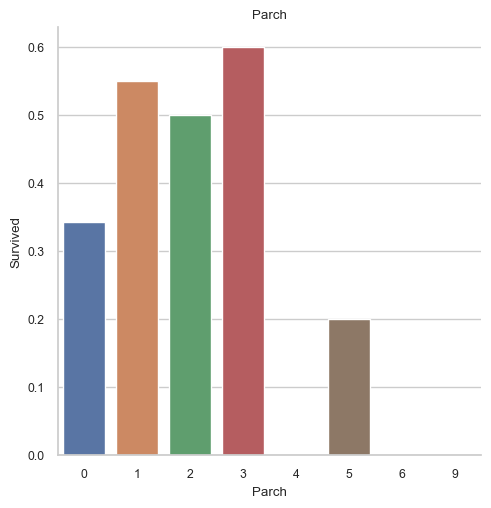

In [101]:
Parch_Analysis = combined[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='Parch',y='Survived',data=Parch_Analysis,kind="bar").set(title='Parch')

<p><span style="font-size: 20px;"><strong>Factor #5:</strong></span><span style="font-size: 18px;"> Age</span></p>

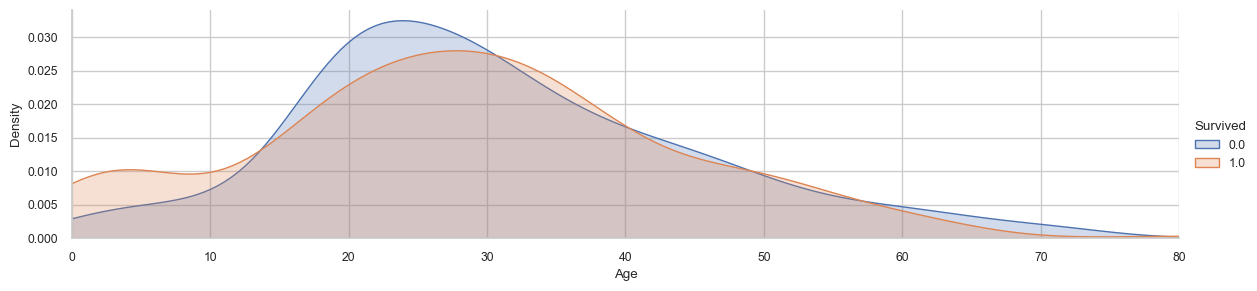

In [102]:
fig = sns.FacetGrid(combined,hue='Survived',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,combined['Age'].max()))

fig.add_legend()

<p><span style="font-size: 18px;">Even though major insights are provided by this illustration, it can be observed from the peak that the younger people had more chances of not survivoring.</span></p>

<p><span style="font-size: 20px;"><strong>Factor #6:</strong></span><span style="font-size: 18px;"> Embarked</span></p>

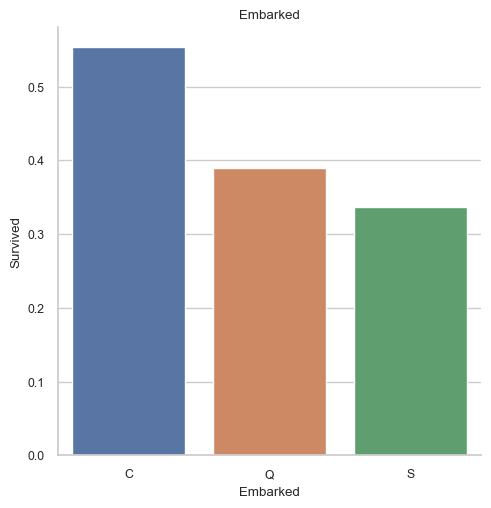

In [103]:
Embarked_Analysis = combined[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sns.catplot(x='Embarked',y='Survived',data=Embarked_Analysis,kind="bar").set(title='Embarked')

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


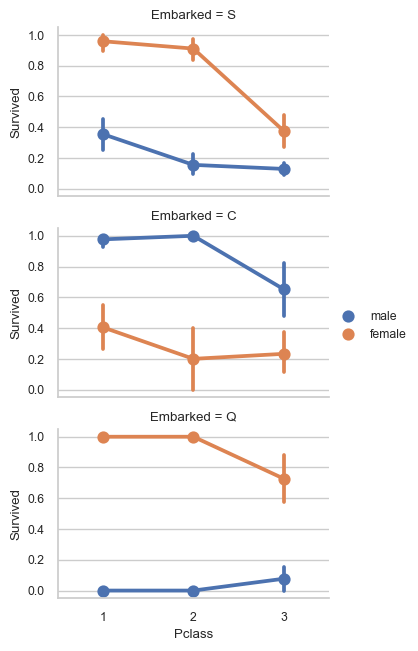

In [104]:
grid = sns.FacetGrid(combined, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

<p><span style="font-size: 18px;">With these two illustrations, we can gain many insights on how the Embarking had a significant effect on the Survival Rate</span></p>
<ul>
    <li><span style="font-size: 18px;">Passengers onboarding from Southampton have more chances are surviving than those who onboarded from Cherbourg</span></li>
    <li><span style="font-size: 18px;">Even though female passengers are more survive than male passengers, however, this trend seems to reverse for passengers who onboarded from Cherbourg: where they are 4x more likely to survive</span></li>
</ul>

<p><span style="font-size: 18px;">Firstly, the data is already divided into training and testing sets. Each model will be training in the training data and the tested with the testing data. Based on that, each model will be scored accordingly.</span></p>

In [132]:
Y_train = train['Survived']
X_train = train.drop(["Survived", "PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
X_test = test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
# We wont be needing the PassengerID, Name, Ticket, Cabin
X_train[[col for col in X_train.columns if X_train[col].dtype == "int64"]] = X_train[[col for col in X_train.columns if X_train[col].dtype == "int64"]].astype("float64")

In [133]:
print(X_train.dtypes)

Pclass      float64
Sex          object
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Embarked     object
dtype: object


<p><span style="font-size: 18px;">To better train the model, the object type columns should be converted to category data type. This will give a numeric representative of each object type data.</span></p>

In [134]:
X_train['Embarked'].fillna(X_train['Embarked'].mode()[0], inplace=True)
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

X_train[['Sex','Embarked']] =  X_train[['Sex','Embarked']].astype('category')
X_test[['Sex','Embarked']] =  X_test[['Sex','Embarked']].astype('category')
print(X_train.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0     3.0    male  22.0    1.0    0.0   7.2500        S
1     1.0  female  38.0    1.0    0.0  71.2833        C
2     3.0  female  26.0    0.0    0.0   7.9250        S
3     1.0  female  35.0    1.0    0.0  53.1000        S
4     3.0    male  35.0    0.0    0.0   8.0500        S


In [137]:
label_encoder = LabelEncoder()
Test = X_train
for col in X_train.columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    Test[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])
print(X_train.head())

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       2    1   28      1      0    18         2
1       0    0   51      1      0   207         0
2       2    0   34      0      0    41         2
3       0    0   47      1      0   189         2
4       2    1   47      0      0    43         2


In [109]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)

[[ 0.82737724  0.73769513 -0.80742213 ... -0.47367361 -1.24717035
   0.58595414]
 [-1.56610693 -1.35557354  0.09365622 ... -0.47367361  1.45116508
  -1.9423032 ]
 [ 0.82737724 -1.35557354 -0.57235821 ... -0.47367361 -0.91880149
   0.58595414]
 ...
 [ 0.82737724 -1.35557354  1.54321704 ...  2.00893337  0.36612014
   0.58595414]
 [-1.56610693  0.73769513 -0.57235821 ... -0.47367361  0.6802121
  -1.9423032 ]
 [ 0.82737724  0.73769513 -0.25893966 ... -0.47367361 -1.07584746
  -0.67817453]]


In [110]:
scaler = StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
print(Y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


<p><span style="font-size: 18px;"><strong>Similarly, the numeric values were also label encoded to ensure that the distribution is more defined and converted to integers value. These steps are not necessary but if processing larger data, they can significantly reduce the processing time. Here are the steps undertook</strong></span></p>
<ul><strong></strong>
    <li style="font-weight: bold;"><span style="font-size: 18px;"><strong>Convert object value to categorical values</strong></span></li>
    <li style="font-weight: bold;"><span style="font-size: 18px;"><strong>Convert float value to defined integer values</strong></span></li>
    <li style="font-weight: bold;"><span style="font-size: 18px;"><strong>Defined the weightage of the value from 0 to 1</strong></span></li>
</ul>

<p><span style="font-size: 18px;"><strong>Now the data is prepared, we will be running different Machine Learning algorithms to predict the survivorship chances of the train data/ These are the following models, we will be using:</strong></span></p>
<ul>
    <li style="font-weight: bold; font-size: 17px;">Logistic Regression</li>
    <li style="font-weight: bold; font-size: 17px;">Linear Regression</li>
    <li style="font-weight: bold; font-size: 17px;">SVC</li>
    <li style="font-weight: bold; font-size: 17px;">K Neighbors Classifier</li>
    <li style="font-weight: bold; font-size: 17px;">Decision Tree Classifier</li>
</ul>

In [111]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [112]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

84.18

In [113]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
F:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

88.22

In [114]:
logmodel = LinearRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)
lin_score = round(logmodel.score(X_train, Y_train) * 100, 2)
lin_score

39.2

In [115]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
dt_pred = dt_model.predict(X_test)
dt_score = round(dt_model.score(X_train, Y_train) * 100, 2)
dt_score

98.2

In [116]:
data = [['Logistic Regression', acc_log], ['Linear Regression', lin_score],['Support Vector Machines', acc_svc], ['Decision Tree', dt_score], ['K Neighbors Classifier', acc_knn]]
  
# Create the pandas DataFrame
Final_Score = pd.DataFrame(data, columns=['Model', 'Model_Score'])
  
# print dataframe.

Final_Score = Final_Score.sort_values(by='Model_Score', ascending=False).reset_index(drop=True)

[Text(0.5, 1.0, 'SibSp')]

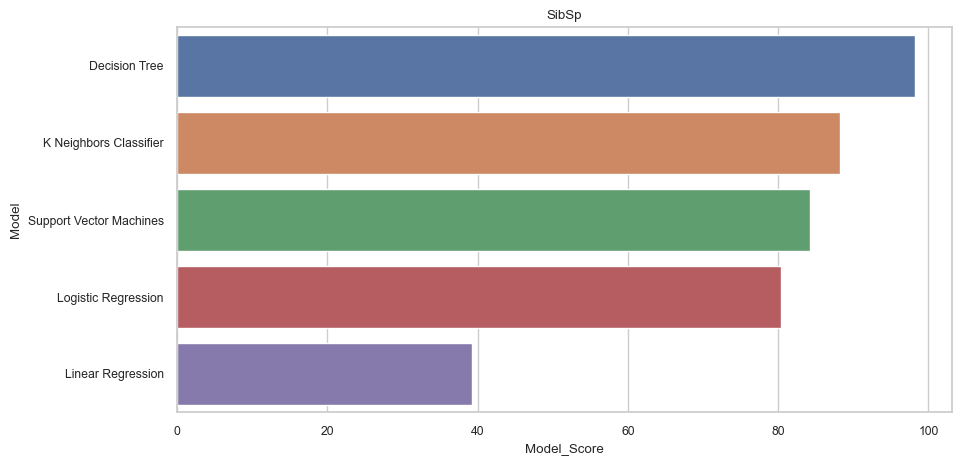

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='Model_Score',y='Model',data=Final_Score,ax=ax).set(title='SibSp')

<p><span style="font-size: 18px;"><strong>Here as you can see, the Decision Tree remains the most accurate predictor of the Modeil with the score of 98.2</strong></span></p>

In [118]:
dt_model=DecisionTreeClassifier()
dt_model_1 = dt_model.fit(X_train,Y_train)
dt_pred = dt_model.predict(X_test)
dt_score = round(dt_model.score(X_train, Y_train) * 100, 2)
dt_score

98.2

In [138]:
for name, importance in zip(Test.columns, dt_model.feature_importances_):
    print(name,":", round(importance * 100, 2))
    ## Now You Can Do Whatever You Want(plot them using a Barplot etc)

Pclass : 10.83
Sex : 30.93
Age : 22.91
SibSp : 4.9
Parch : 2.29
Fare : 26.06
Embarked : 2.08


<p><span style="font-size: 18px;">Here you can easily see that the importance of each factor in determining the final outcome of the passenger. As per the ranking, the gender has the most impact on whether the passenger survived or not. This was further iterated by the bar chart shared above, clearly showcasing that female passenger have 3.5x times chances of surviving than male counterparts</span></p>